# IS 603 Project

## Abstract
Text here.

## Introduction
Text here.

## Importing Libraries

In [141]:
# Libraries to be imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/insurance/insurance.csv


## Exploratory Data Analysis (EDA)

In [142]:
# definiing dataset variable and reading ine .csv file
df = pd.read_csv('../input/insurance/insurance.csv')

# previewing the first few rows of data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [143]:
# seeing number of rows, columns, null counts and the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [144]:
# specifically seeing data types
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [145]:
# summary statistics of the data and its numerical columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [146]:
# seeing count of rows and columns
df.shape

(1338, 7)

In [147]:
# determining whether there is any missing/null/NA data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Encoding Categorical Variables
Currently, three columns (sex, smoker, and region) are non-numerical. This will affect the data analysis if ignored. To fix this, we will convert the object data types into categorical, and then use LabelEncoding to turn the categorical types into numerical.

In [148]:
# changing sex, smoker and region columns to numbers since they are object data type

# sex (female/male)
df['sex'] = df['sex'].astype('category')

# smoker(yes/no)
df['smoker'] = df['smoker'].astype('category')

# region
df['region'] = df['region'].astype('category')

In [149]:
# using LabelEncoder to turn categorical variables into numerical
le = LabelEncoder ()

# sex
le.fit(df.sex.drop_duplicates())
df.sex = le.transform(df.sex)

# smoker
le.fit(df.smoker.drop_duplicates())
df.smoker = le.transform(df.smoker)

# region
le.fit(df.region.drop_duplicates())
df.region = le.transform(df.region)

In [150]:
# checking data types once more
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

In [151]:
# seeing what the encoded variables will look like
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


We can now see that all the columns are numerical after encoding the variables. With the encoded variables the sex column now has 0 = female and 1 = male, smoker column has 0 = no and 1 = yes, and region column has 1 = northwest, 2 = southeast, 3 = southwest, and 4 = northeast.

## Visualizations
We will create visualizations with the encoded data.

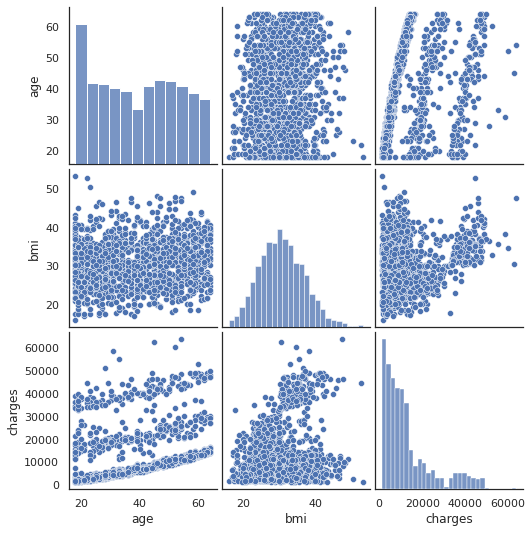

In [152]:
# visualizing a pairplot between age, bmi and charges
sns.pairplot(df[['age', 'bmi', 'charges']])

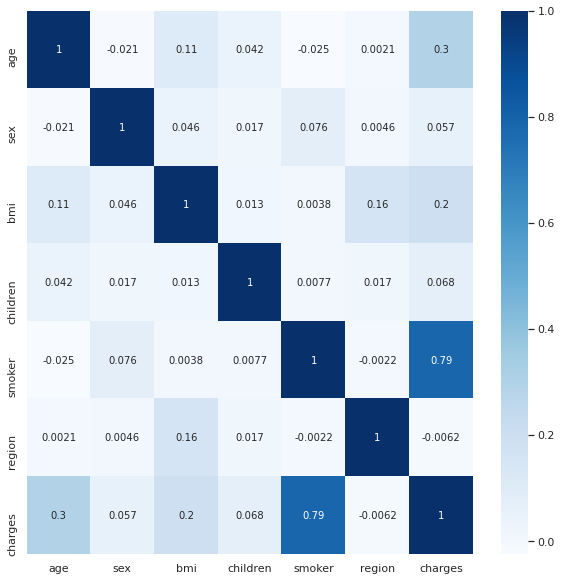

In [153]:
# creating correlation heatmap
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='Blues')

The variable with the highest correlation to charges is smoker, with a correlation of .79. The second most correlated variable is bmi with .16.

Text(0.5, 1.0, 'Distribution of Charges w/ Natural Log')

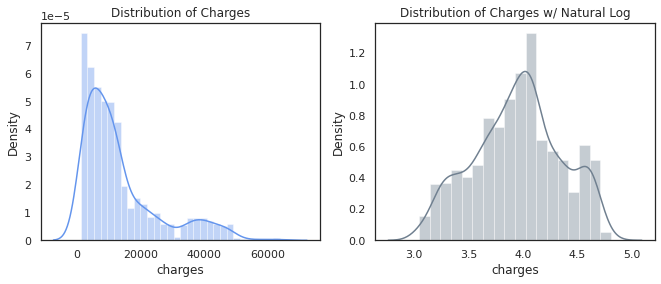

In [154]:
# seeing general distribution of charges
f = plt.figure(figsize = (11,4))
sns.set(style='white')

# without natural log
ax = f.add_subplot(121)
sns.distplot(df['charges'], kde = True, color = 'cornflowerblue', ax = ax)
ax.set_title('Distribution of Charges')

# with natural log
ax = f.add_subplot(122)
sns.distplot(np.log10(df['charges']), kde = True, color = 'slategray', ax = ax)
ax.set_title('Distribution of Charges w/ Natural Log')

The left graph does not look like a normal curve, so we will apply ln (natural log) to normalize the distribution, which is shown on the right.

Text(0.5, 1.0, 'Distribution of Charges for Smokers')

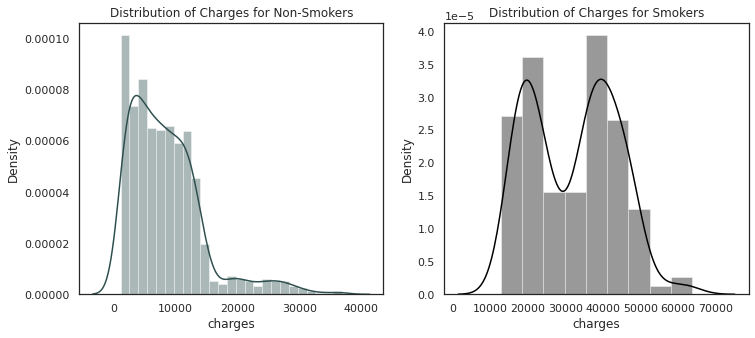

In [155]:
# seeing general distribution of charges for smokers and non-smokers
f = plt.figure(figsize = (12, 5))

# non smokers
ax = f.add_subplot(121)
sns.distplot(df[(df.smoker == 0)]['charges'], color = 'darkslategray', ax = ax)
ax.set_title('Distribution of Charges for Non-Smokers')

# smokers
ax = f.add_subplot(122)
sns.distplot(df[(df.smoker == 1)]['charges'], color = 'black', ax = ax)
ax.set_title('Distribution of Charges for Smokers')

The graph for smokers shows a prevalence of higher medical charges compared to non-smokers. The two peaks for smokers are at around 20,000-30,000 dollars and the peak for non-smokers is below 5,000 dollars. 

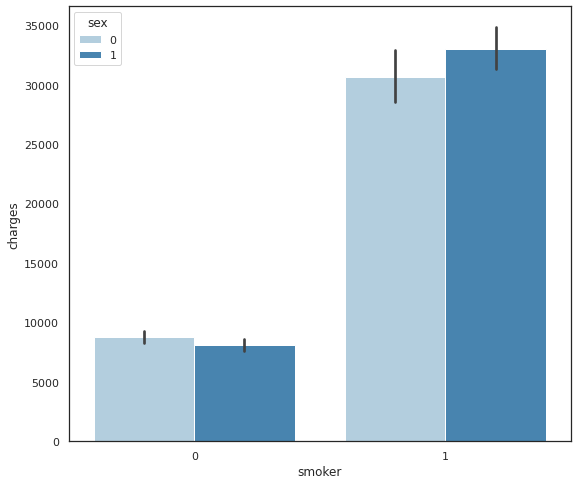

In [156]:
# bar plot to visualize smokers by sex for charges
f, ax = plt.subplots(1,1, figsize=(9,8))
ax = sns.barplot(x = 'smoker', y = 'charges',
                 hue='sex', data=df, palette='Blues')

According to this graph, there are more female non-smokers than males, and more male smokers than females. It is still prevalent that smokers have higher medical charges than the non-smokers.

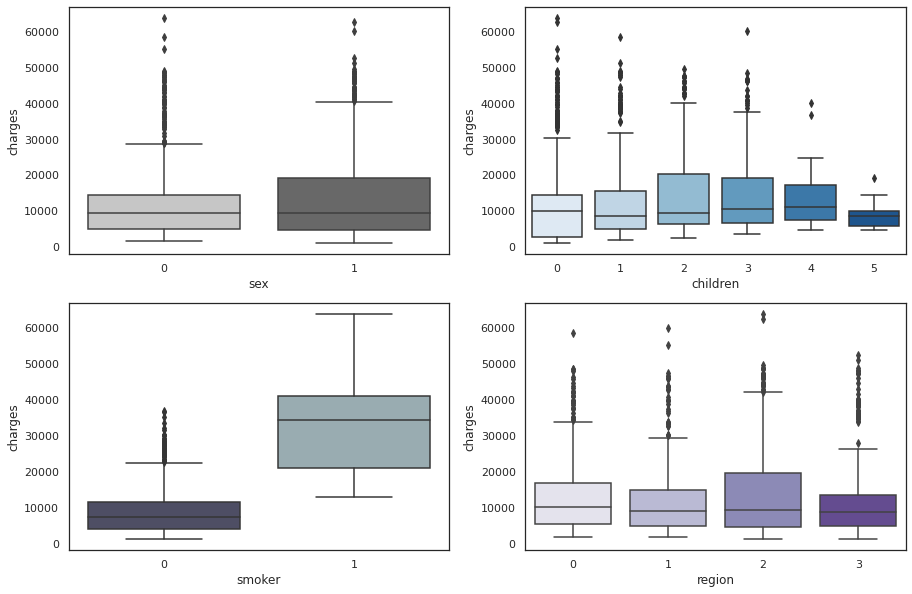

In [157]:
# boxplots to visualize different variables with charges
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.boxplot(x = 'sex', y = 'charges', data = df, palette = 'Greys')
plt.subplot(2,2,2)
sns.boxplot(x = 'children', y = 'charges', data = df, palette = 'Blues')
plt.subplot(2,2,3)
sns.boxplot(x = 'smoker', y = 'charges', data = df, palette = 'bone')
plt.subplot(2,2,4)
sns.boxplot(x = 'region', y = 'charges', data = df, palette = 'Purples')
plt.show()

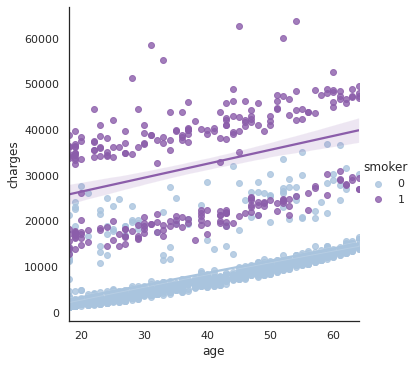

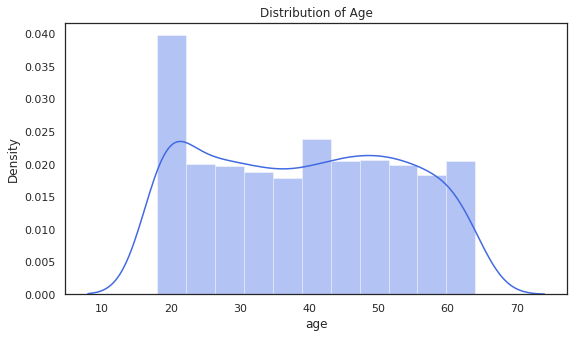

In [158]:
# seeing distribution with age and charges
ax = sns.lmplot(x = 'age', y = 'charges', data = df, hue = 'smoker', palette = 'BuPu')
plt.figure(figsize=(9,5))
plt.title('Distribution of Age')
ax = sns.distplot(df['age'], color = 'royalblue')

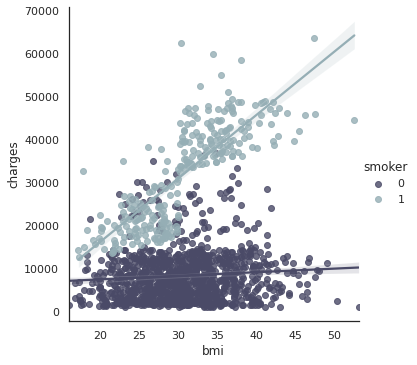

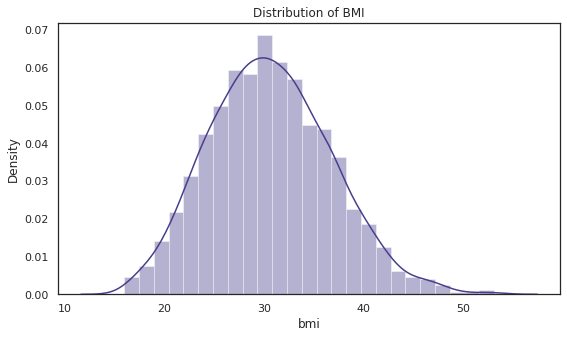

In [159]:
# seeing distribution with bmi and charges
ax = sns.lmplot(x = 'bmi', y = 'charges', data = df, hue = 'smoker', palette = 'bone')
plt.figure(figsize = (9,5))
plt.title('Distribution of BMI')
ax = sns.distplot(df['bmi'], color = 'darkslateblue')

Text(0.5, 1.0, 'Smokers and Non-smokers With Children')

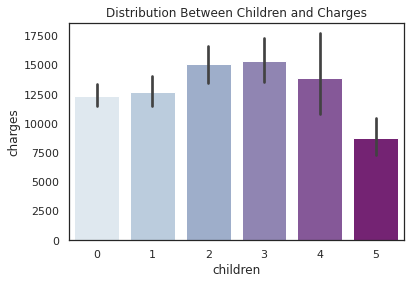

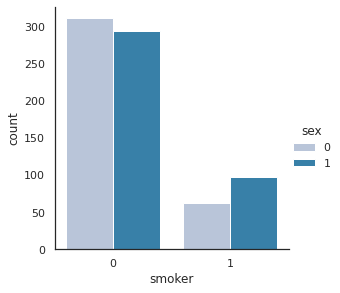

In [160]:
# seeing distribution with children and charges
plt.title('Distribution Between Children and Charges')
sns.barplot(x = df['children'], y = df['charges'], palette = 'BuPu')

# bar plot to visualize smokers by children for charges
sns.catplot(x = 'smoker', kind = 'count', palette = 'PuBu',hue = 'sex',
            data = df[(df.children > 0)], size = 4)
ax.set_title('Smokers and Non-smokers With Children')

## Linear Regression

In [164]:
# creating train and test data
x = df.drop(['charges'], axis = 1)
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state = 0)

In [165]:
# running the algorithm
lr = LinearRegression().fit(x_train,y_train)

In [166]:
# printing result scores
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.799874714544996


In [167]:
# printing out intercept
print(lr.intercept_)

-11661.983908824413


In [168]:
# printing coefficients
print(lr.coef_)

[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]


In [169]:
# Printing performance scores of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 3930.3332739011403
Mean Squared Error: 31845929.134159427
Root Mean Squared Error: 5643.2197488809015


In [170]:
# Predicting the medical charges
y_test_pred = lr.predict(x_test)
# Comparing actual recorded values with predicted values
dflin = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
dflin

,Actual,Predicted
578,9724.53000,11017.230479
610,8547.69130,9787.530168
569,45702.02235,37994.782118
1034,12950.07120,16122.778407
198,9644.25250,6930.759230
...,...,...
1084,15019.76005,14699.098767
726,6664.68595,8210.854549
1132,20709.02034,16019.284542
725,40932.42950,33104.944084
